In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('data/Airbnb_Open_Data_Clean.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\higor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\higor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Função para tratar os títulos
def process_title(title):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(title)
    filtered_title = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_title)

In [3]:
# Aplicar o processamento aos títulos
df['processed_title'] = df['NAME'].dropna().apply(process_title)

# Concatenar todos os títulos processados em uma única string
all_processed_titles = ' '.join(df['processed_title'].dropna())


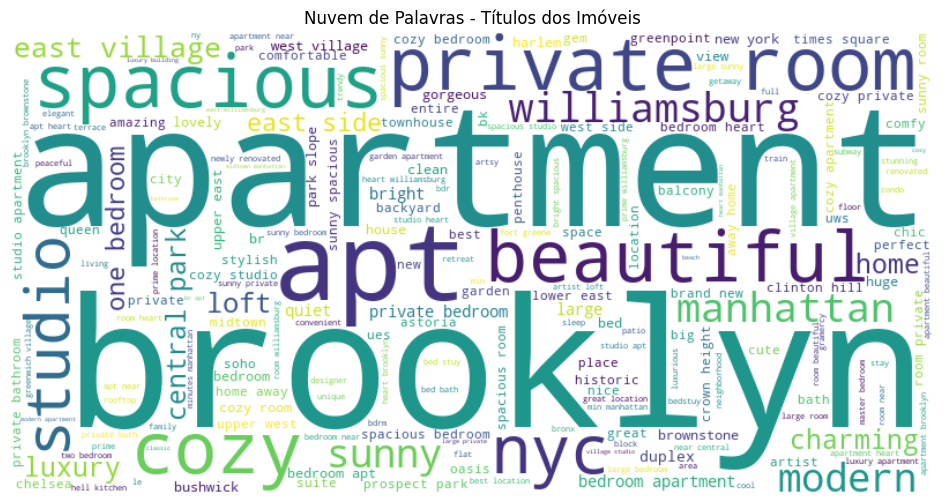

In [4]:
# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_processed_titles)

# Exibir a nuvem de palavras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Títulos dos Imóveis')
plt.show()

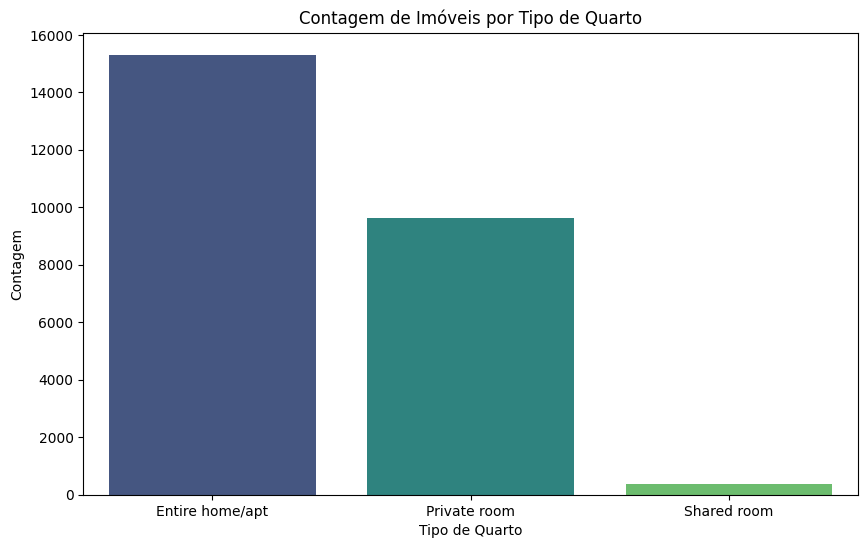

In [5]:
# Gráfico de contagem de imóveis por tipo de quarto
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', data=df, palette='viridis')
plt.title('Contagem de Imóveis por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Contagem')
plt.show()

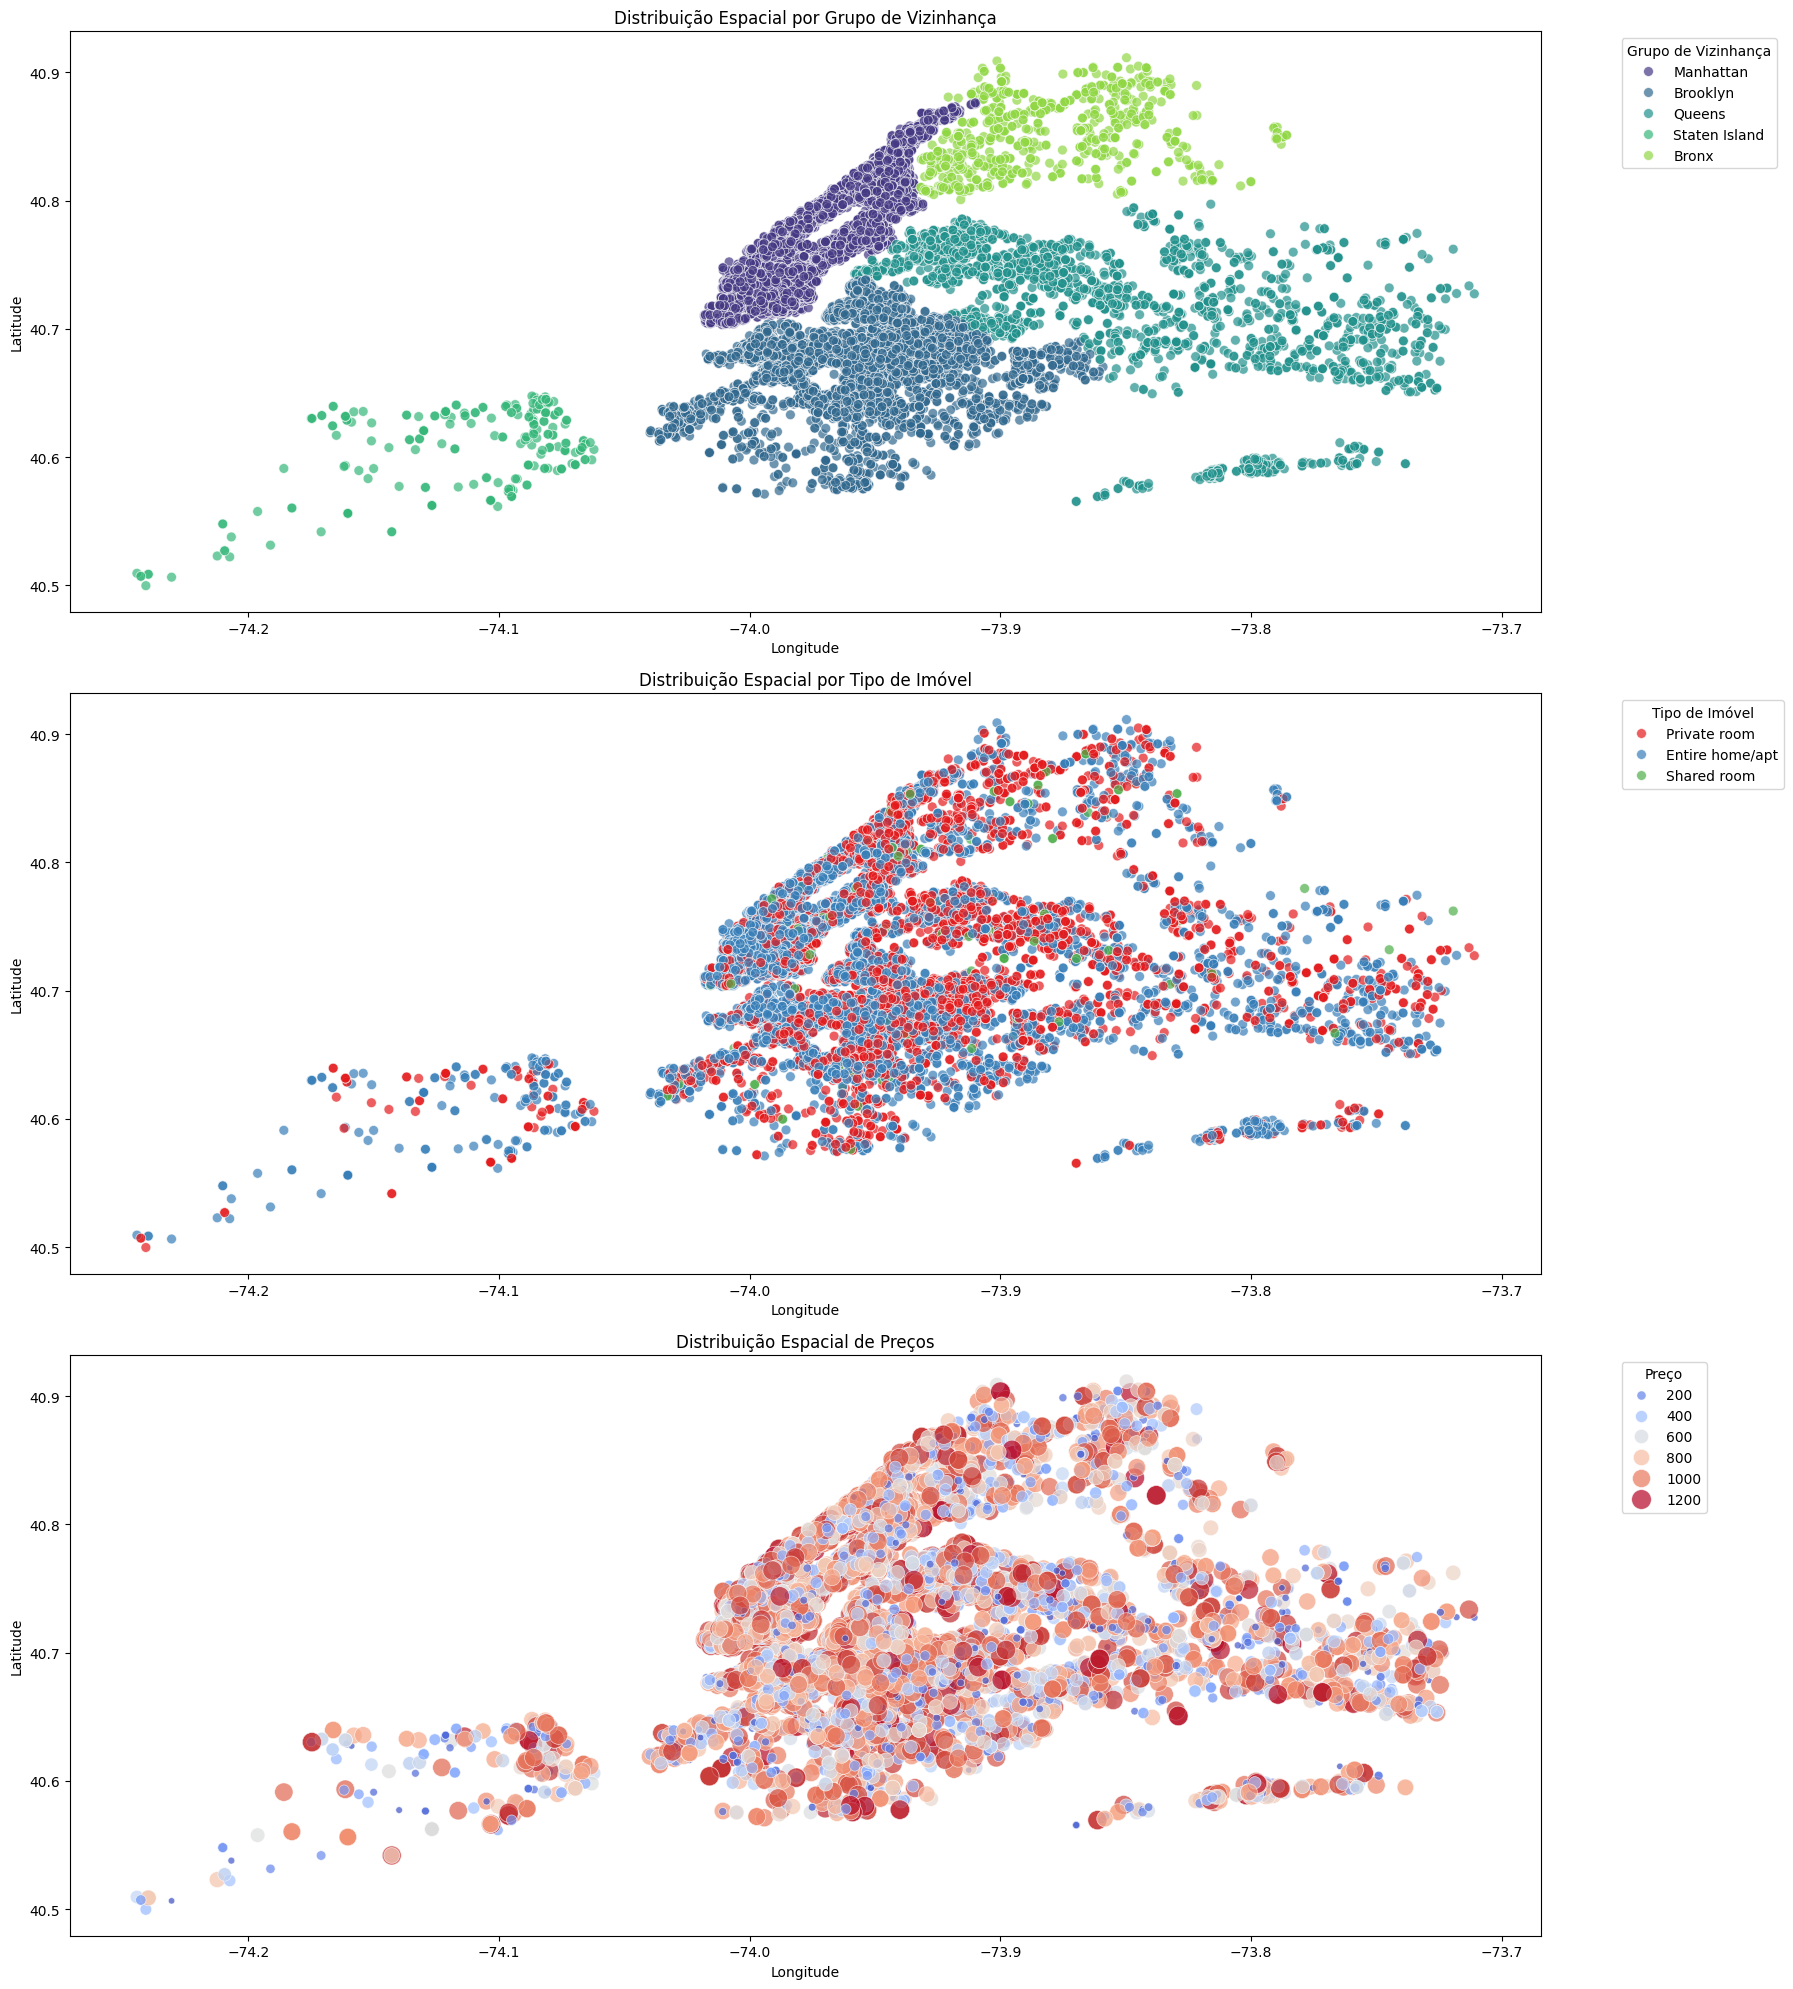

In [24]:
# Ajustar o tamanho dos gráficos
plt.figure(figsize=(18, 20))

# Gráfico para a distribuição espacial por grupo de vizinhança
plt.subplot(3, 1, 1)
sns.scatterplot(x='long', y='lat', data=df, hue='neighbourhood group', palette='viridis', alpha=0.7, s=50)
plt.title('Distribuição Espacial por Grupo de Vizinhança')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Grupo de Vizinhança', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico para a distribuição espacial por tipo de imóvel
plt.subplot(3, 1, 2)
sns.scatterplot(x='long', y='lat', data=df, hue='room type', palette='Set1', alpha=0.7, s=50)
plt.title('Distribuição Espacial por Tipo de Imóvel')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tipo de Imóvel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico para a distribuição espacial de preços
plt.subplot(3, 1, 3)
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='coolwarm', size='price', sizes=(20, 200), alpha=0.7)
plt.title('Distribuição Espacial de Preços')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Preço', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()